
# Setup



In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.options.mode.copy_on_write = True

# Using the URL for the file
spotify_original = pd.read_csv("dataset.csv")

spotify_original_reshape = spotify_original.iloc[:,1:]

# Data Cleaning

In [3]:
#spotify_original_reshape.head(20)
#spotify_original.shape
spotify_original_reshape

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [4]:
spotify_original_reshape['track_name'].describe()

count              113999
unique              73608
top       Run Rudolph Run
freq                  151
Name: track_name, dtype: object

In [5]:
spotify_original_reshape['popularity'].describe()

count    114000.000000
mean         33.238535
std          22.305078
min           0.000000
25%          17.000000
50%          35.000000
75%          50.000000
max         100.000000
Name: popularity, dtype: float64

In [6]:
spotify_original_reshape['track_genre'].describe()

count       114000
unique         114
top       acoustic
freq          1000
Name: track_genre, dtype: object

In [7]:
missing_track = spotify_original_reshape[spotify_original_reshape['track_id'] == '1kR4gIb7nGxHPI3D2ifs59']
print(missing_track)

                     track_id artists album_name track_name  popularity  \
65900  1kR4gIb7nGxHPI3D2ifs59     NaN        NaN        NaN           0   

       duration_ms  explicit  danceability  energy  key  loudness  mode  \
65900            0     False         0.501   0.583    7     -9.46     0   

       speechiness  acousticness  instrumentalness  liveness  valence  \
65900       0.0605          0.69           0.00396    0.0747    0.734   

         tempo  time_signature track_genre  
65900  138.391               4       k-pop  


In [8]:
# Cleaning rows with missing information
missing_data_rows = spotify_original_reshape[spotify_original_reshape.isnull().any(axis=1)]

missing_data_rows

spotify_original_reshape_drop = spotify_original_reshape.dropna()

print(spotify_original_reshape.shape)
print(spotify_original_reshape_drop.shape)

(114000, 20)
(113999, 20)


In [9]:
#clean track_name and artists columns by stripping spaces and converting to lowercase
spotify_original_reshape_drop['track_name_clean'] = spotify_original_reshape_drop['track_name'].str.strip().str.lower()
spotify_original_reshape_drop['artists_clean'] = spotify_original_reshape_drop['artists'].str.strip().str.lower()

#priority list for genres to handle duplicates
genre_priority = ['pop', 'rock', 'hip hop', 'rap', 'reggaeton', 'latin', 'electronic', 'r&b', 'reggae', 'dance', 'classical']
spotify_original_reshape_drop['genre_priority'] = spotify_original_reshape_drop['track_genre'].apply(lambda x: genre_priority.index(x) if x in genre_priority else len(genre_priority))

#sort the dataset by track_name, artists, genre priority, popularity, and duration
spotify_data_sorted = spotify_original_reshape_drop.sort_values(by=['track_name_clean', 'artists_clean', 'genre_priority', 'popularity', 'duration_ms'],
                                                                ascending=[True, True, True, True, False])

#remove duplicates
spotify_cleaned = spotify_data_sorted.drop_duplicates(subset=['track_name_clean', 'artists_clean'], keep='first')

# checking size
print(f"Shape of the dataset before cleaning: {spotify_original_reshape_drop.shape}")
print(f"Shape of the dataset after cleaning: {spotify_cleaned.shape}")

# removing extra columns added
spotify_cleaned_final = spotify_cleaned.drop(columns=['track_name_clean', 'artists_clean', 'genre_priority'])

# Fcheck size again
print(f"Shape of the dataset after removing extra columns: {spotify_cleaned_final.shape}")


spotify_cleaned_final


Shape of the dataset before cleaning: (113999, 23)
Shape of the dataset after cleaning: (81206, 23)
Shape of the dataset after removing extra columns: (81206, 20)


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
36750,0fROT4kK5oTm8xO8PX6EJF,Rilès,!I'll Be Back!,!I'll Be Back!,52,178533,True,0.823,0.6120,1,-7.767,1,0.2480,0.1680,0.000000,0.1090,0.6880,142.959,4,french
92751,1hH0t381PIXmUVWyG1Vj3p,Brian Hyland,The Bashful Blond,"""A"" You're Adorable",39,151680,False,0.615,0.3750,0,-10.362,0,0.0319,0.4820,0.000000,0.1110,0.9220,110.720,4,rockabilly
66996,73lXf5if6MWVWnsgXhK8bd,Little Apple Band,Sesame Street and Friends,"""C"" is for Cookie",8,86675,False,0.664,0.6110,3,-8.687,1,0.0886,0.1200,0.000000,0.0408,0.7580,118.443,4,kids
101161,0jmz4aHEIBCRgrcV2xEkwB,Traditional;Sistine Chapel Choir;Massimo Palom...,Classical Christmas,"""Christe, Redemptor omnium""",0,289133,False,0.111,0.0568,10,-28.053,1,0.0551,0.9900,0.697000,0.1100,0.0395,169.401,1,sleep
82584,5Zx0Rrkn5RFBMD2PRxX3mI,Dillinger Four,C I V I L W A R,"""Contemplate This on the Tree of Woe.""",24,180706,False,0.565,0.9770,11,-3.592,1,0.0546,0.0282,0.001320,0.4330,0.3870,106.478,4,power-pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65756,2oVHb8wyg6oC2iNpGBNvx1,HEIZE,Hotel del Luna (Original Television Soundtrack...,내 맘을 볼 수 있나요,63,225785,False,0.397,0.1660,9,-10.678,1,0.0349,0.8840,0.000000,0.1000,0.1310,134.708,4,k-pop
65859,4kIpBfvK44bxqX7zo8K1oP,Gaho,ITAEWON CLASS (Original Television Soundtrack)...,시작,65,202440,False,0.591,0.8180,4,-3.532,1,0.0730,0.1720,0.000000,0.1260,0.5740,108.107,4,k-pop
75903,4mHc7LUlO3k6AXeFV2EiJK,Yiruma,Yiruma Official Album 'Piano Therapy' (The Ori...,약속 (Piano Solo),37,144533,False,0.504,0.1430,1,-18.713,1,0.0701,0.9800,0.922000,0.1240,0.0584,148.786,4,new-age
79554,0tQesiSZJQOdHeAC7r59us,GODA,One Punch Man (Original Soundtrack),원펀맨 Theme - Sad Theme,37,228000,False,0.542,0.3370,2,-16.088,1,0.0539,0.9850,0.933000,0.1470,0.4430,159.951,4,piano


# Exploratory Data Analysis




<Axes: >

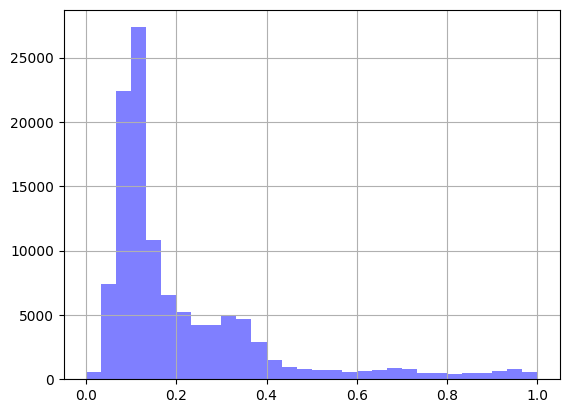

In [10]:
"""
Histograms
"""
spotify_original_reshape['liveness'].hist(bins = 30, alpha = 0.5, color='blue')

Text(0.5, 1.0, 'Danceability vs Popularity')

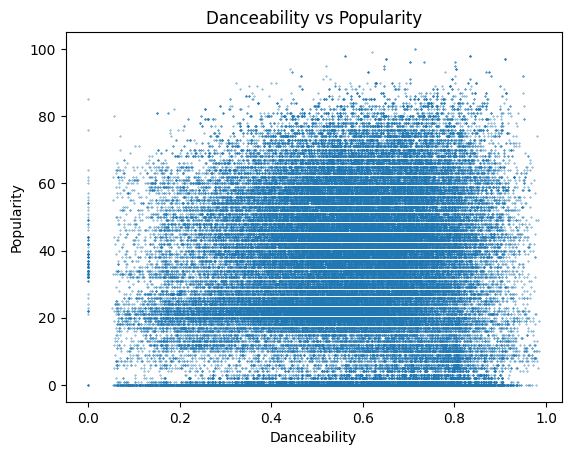

In [11]:
"""
Visualizing correlation between dancebility and popularity features
"""

plt.scatter(spotify_original_reshape['danceability'], spotify_original_reshape['popularity'], s = 0.1)
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.title('Danceability vs Popularity')

Text(0.5, 1.0, 'Energy vs Popularity')

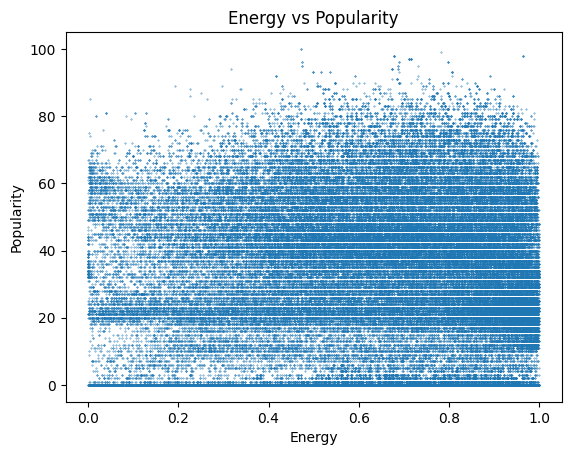

In [12]:
"""
Visualizing correlation between energy and popularity
"""

plt.scatter(spotify_original_reshape['energy'], spotify_original_reshape['popularity'], s = 0.1)
plt.xlabel('Energy')
plt.ylabel('Popularity')
plt.title('Energy vs Popularity')

In [13]:
"""
Visualizing the Correlation Between Popularity and other features
"""

for features in spotify_original_reshape.select_dtypes(include=[np.number]).columns:
  print(features, 'vs. Popularity Correlation:', np.corrcoef(spotify_original_reshape['popularity'], spotify_original_reshape[features])[0,1])


popularity vs. Popularity Correlation: 1.0
duration_ms vs. Popularity Correlation: -0.007101208619704798
danceability vs. Popularity Correlation: 0.03544813475138602
energy vs. Popularity Correlation: 0.0010561362996985358
key vs. Popularity Correlation: -0.0038531547155607167
loudness vs. Popularity Correlation: 0.050423036100497844
mode vs. Popularity Correlation: -0.013930786753107976
speechiness vs. Popularity Correlation: -0.04492654926158638
acousticness vs. Popularity Correlation: -0.0254724125683634
instrumentalness vs. Popularity Correlation: -0.09513920344466412
liveness vs. Popularity Correlation: -0.005387153831593024
valence vs. Popularity Correlation: -0.04053429465994628
tempo vs. Popularity Correlation: 0.013204659932994911
time_signature vs. Popularity Correlation: 0.03107275876010802


In [14]:
"""
Visualizing the Correlation Between Tempo and other features
"""

for features in spotify_original_reshape.select_dtypes(include=[np.number]).columns:
  print(features, 'vs. Tempo Correlation:', np.corrcoef(spotify_original_reshape['tempo'], spotify_original_reshape[features])[0,1])


popularity vs. Tempo Correlation: 0.013204659932994911
duration_ms vs. Tempo Correlation: 0.0243456056906004
danceability vs. Tempo Correlation: -0.050449871431220095
energy vs. Tempo Correlation: 0.24785050980262321
key vs. Tempo Correlation: 0.010916619112810331
loudness vs. Tempo Correlation: 0.21244589657951524
mode vs. Tempo Correlation: 0.0005655581057944983
speechiness vs. Tempo Correlation: 0.01727322333048471
acousticness vs. Tempo Correlation: -0.20822414719631335
instrumentalness vs. Tempo Correlation: -0.050330401327874745
liveness vs. Tempo Correlation: 0.0005997673113031
valence vs. Tempo Correlation: 0.07827306763947267
tempo vs. Tempo Correlation: 1.0
time_signature vs. Tempo Correlation: 0.06664108820639168


danceability        1.000000
valence             0.492137
loudness            0.265067
time_signature      0.207024
energy              0.134576
speechiness         0.108483
popularity          0.084179
key                 0.032563
tempo              -0.015294
mode               -0.059259
duration_ms        -0.060047
liveness           -0.132165
acousticness       -0.167830
instrumentalness   -0.191710
Name: danceability, dtype: float64


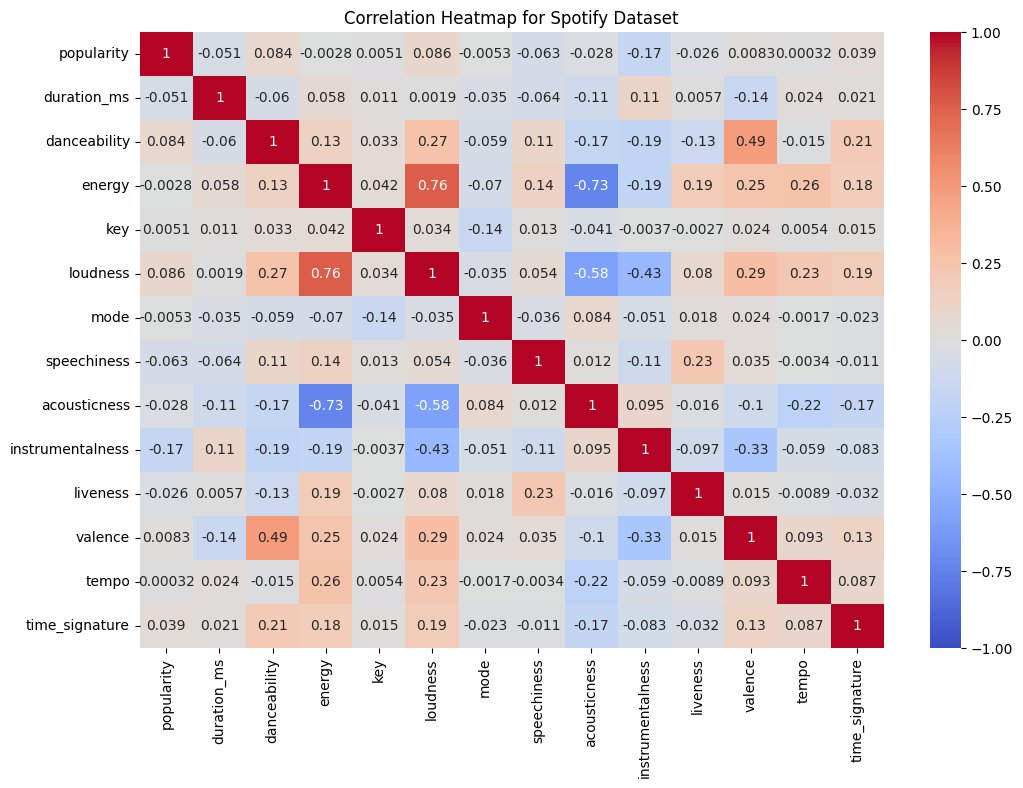

In [15]:
"""
Correlation matrix and Heatmap
"""

numeric_data = spotify_cleaned_final.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_data.corr()

danceability_correlation = correlation_matrix["danceability"].sort_values(ascending=False)

print(danceability_correlation)

import seaborn as sns
import matplotlib.pyplot as plt


# Create a heatmap to visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Spotify Dataset')
plt.show()

Text(0.5, 1.0, 'Duration (ms) Histogram')

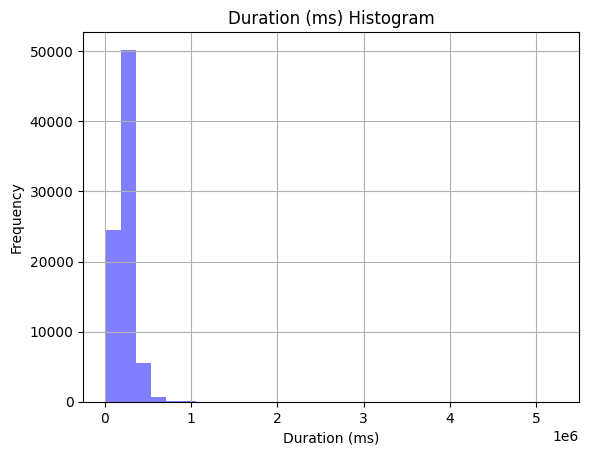

In [16]:
"""
Histogram of duration_ms
"""

spotify_cleaned_final['duration_ms'].hist(bins = 30, alpha = 0.5, color='blue')
  
plt.xlabel('Duration (ms)')
plt.ylabel('Frequency')
plt.title('Duration (ms) Histogram')



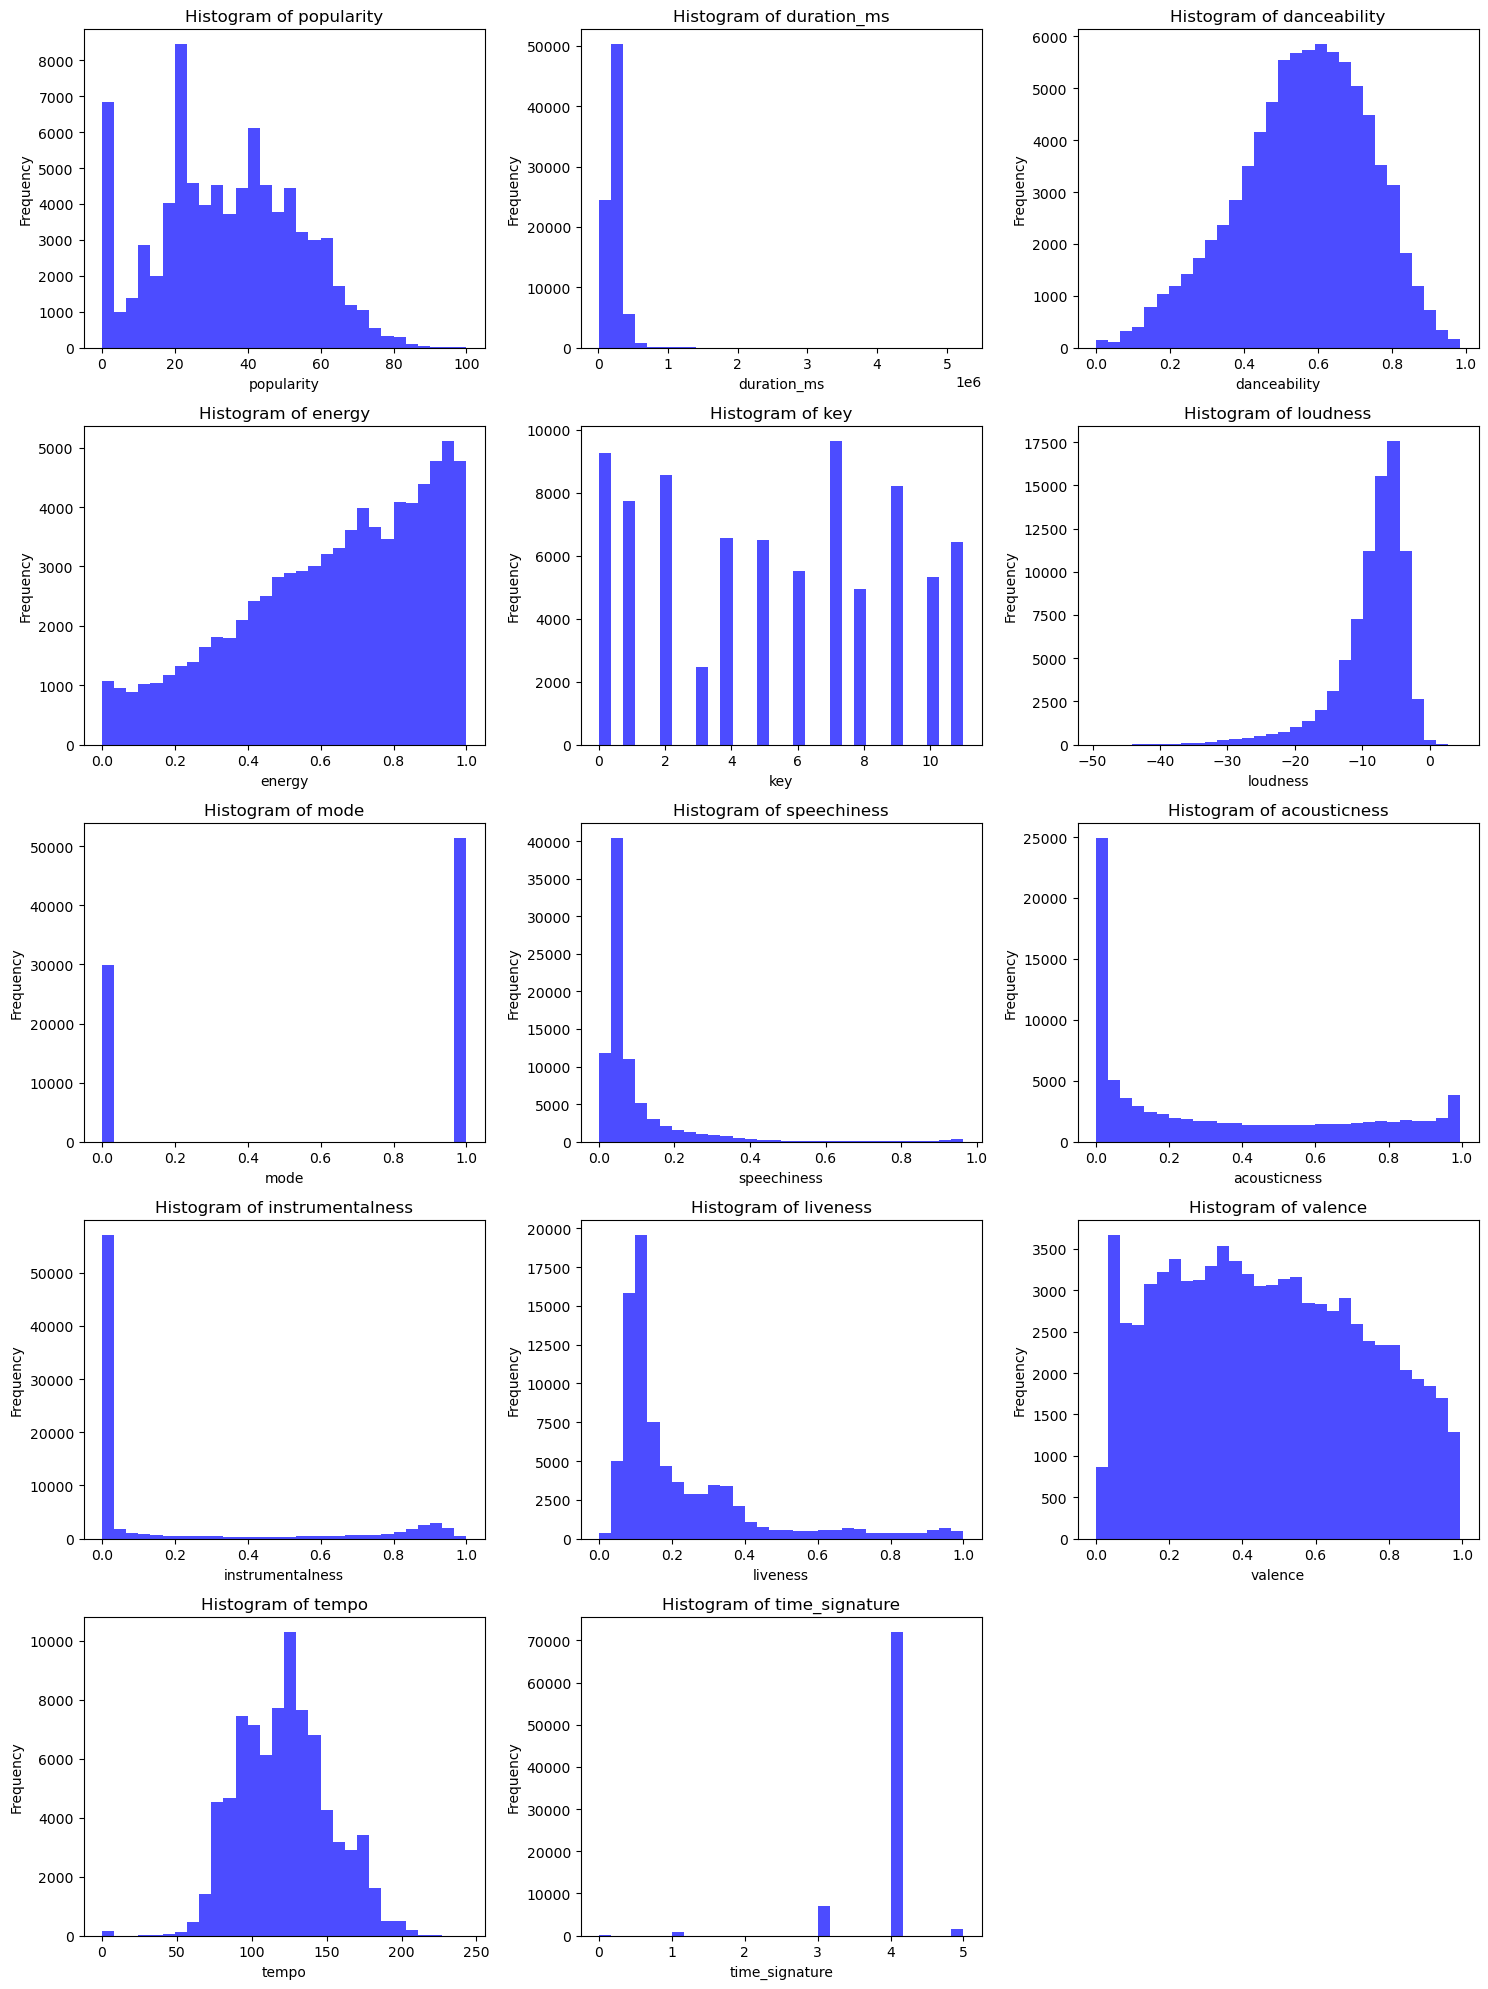

In [43]:
import matplotlib.pyplot as plt

# Define the number of columns and rows for subplots based on the number of features
num_columns = len(numeric_data.columns)
num_rows = (num_columns // 3) + (num_columns % 3 > 0)  # 3 histograms per row

# Create subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 4))
axes = axes.flatten()  # Flatten axes array for easy iteration

# Plot histograms for each numeric column
for i, column in enumerate(numeric_data.columns):
    axes[i].hist(numeric_data[column], bins=30, alpha=0.7, color='blue')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Turn off empty subplots if any
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.6)  # Increase spacing

# Display the plots
plt.tight_layout()
plt.show()

# 3. Regression Analysis